**1. Data Preprocessing:**

o Load the dataset and focus on the 'Close' price column, as this will be
your target variable for prediction.

o Normalize the data (e.g., using Min-Max scaling to keep values between 0
and 1).

o Split the dataset into a training set (80%) and a testing set (20%).

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset

df = pd.read_csv('/content/HistoricalQuotes.csv')
print(df.head())


         Date  Close/Last     Volume      Open      High       Low
0  02/28/2020     $273.36  106721200   $257.26   $278.41   $256.37
1  02/27/2020     $273.52   80151380    $281.1      $286   $272.96
2  02/26/2020     $292.65   49678430   $286.53   $297.88    $286.5
3  02/25/2020     $288.08   57668360   $300.95   $302.53   $286.13
4  02/24/2020     $298.18   55548830   $297.26   $304.18   $289.23


In [ ]:
df.columns = df.columns.str.strip()
df['Close/Last'] = df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
print(df[['Date', 'Close/Last']].head())


         Date  Close/Last
0  02/28/2020      273.36
1  02/27/2020      273.52
2  02/26/2020      292.65
3  02/25/2020      288.08
4  02/24/2020      298.18


In [ ]:
# Importing MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Normalizing
df['Close/Last_scaled'] = scaler.fit_transform(df[['Close/Last']])
print(df[['Date', 'Close/Last', 'Close/Last_scaled']].head())


         Date  Close/Last  Close/Last_scaled
0  02/28/2020      273.36           0.818943
1  02/27/2020      273.52           0.819481
2  02/26/2020      292.65           0.883813
3  02/25/2020      288.08           0.868444
4  02/24/2020      298.18           0.902409


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data
train_data, test_data = train_test_split(df[['Close/Last_scaled']], test_size=0.2, shuffle=False)

# Printing the sizes of the training and testing sets
print("Training data size:", len(train_data))
print("Testing data size:", len(test_data))

print("Training set sample:")
print(train_data.head())

print("Testing set sample:")
print(test_data.head())


Training data size: 2014
Testing data size: 504
Training set sample:
   Close/Last_scaled
0           0.818943
1           0.819481
2           0.883813
3           0.868444
4           0.902409
Testing set sample:
      Close/Last_scaled
2014           0.152247
2015           0.150638
2016           0.147746
2017           0.146136
2018           0.147006


**2. Create Training Sequences:**

o Convert the 'Close' prices into a series of sequences for training.

o Define a sequence length (e.g., 60 days), where each sequence will be
used to predict the stock price for the next day.

In [ ]:
import numpy as np

sequence_length = 60
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        # Appending the sequence of 'seq_length' days to sequences list
        sequences.append(data[i:i + seq_length])
        # Appending the next day's price (target) to the targets list
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

# Creating sequences from the training data
train_sequences, train_targets = create_sequences(train_data['Close/Last_scaled'].values, sequence_length)

# Creating sequences from the testing data
test_sequences, test_targets = create_sequences(test_data['Close/Last_scaled'].values, sequence_length)

print("Training Sequences shape:", train_sequences.shape)
print("Training Targets shape:", train_targets.shape)
print("Testing Sequences shape:", test_sequences.shape)
print("Testing Targets shape:", test_targets.shape)


Training Sequences shape: (1954, 60)
Training Targets shape: (1954,)
Testing Sequences shape: (444, 60)
Testing Targets shape: (444,)


**3. Build the RNN Model:**

o Define an RNN model with the following architecture:

▪ An RNN layer with 50 units

▪ A Dense layer with 1 unit (for regression output)

o Use the mean squared error (MSE) loss function and the Adam optimizer.

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Define the RNN model architecture
model = Sequential()

# Add an RNN layer with 50 units
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(train_sequences.shape[1], 1)))

# Add a Dense layer with 1 unit (for regression output)
model.add(Dense(units=1))

# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(), loss='mean_squared_error')


**4. Train the Model:**

o Train the model on the training set for 50 epochs with a batch size of 32.

o Use validation data to check for overfitting.

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0145 - val_loss: 4.2227e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.9187e-04 - val_loss: 2.1333e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.7597e-04 - val_loss: 1.1147e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.2737e-04 - val_loss: 1.8222e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.4091e-04 - val_loss: 1.6815e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7978e-04 - val_loss: 6.1166e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.3046e-04 - val_loss: 5.2910e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2630e-04 - val_loss: 5.3973e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0270e-04 - val_loss: 4.9294e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2081e-04 - val_loss: 8.9165e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1400e-04 - 

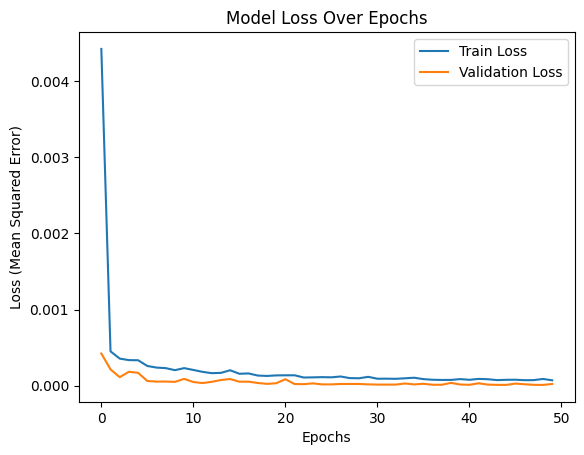

In [ ]:
history = model.fit(
    train_sequences,
    train_targets,
    epochs=50,
    batch_size=32,
    validation_data=(test_sequences, test_targets)
)

# Plotting the training and validation loss
import matplotlib.pyplot as plt

# Plotting the training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()


**5. Make Predictions:**

o Predict the stock prices on the test set and transform the results back to
the original scale if normalization was applied.

o Plot the predicted vs. actual stock prices to visualize the model’s
performance.

In [ ]:
# Making predictions on the test set
predicted_scaled = model.predict(test_sequences)

# Reshaping the predicted values
predicted_scaled = predicted_scaled.reshape(-1, 1)

# Reversing the normalization to bring back the values to the original scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting the scaler on the 'Close/Last' data to reverse the scaling
scaler.fit(df[['Close/Last']])

# Inversing transform the scaled predictions
predicted_prices = scaler.inverse_transform(predicted_scaled)

#inverse transform the actual test target prices
actual_prices = scaler.inverse_transform(test_targets.reshape(-1, 1))


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


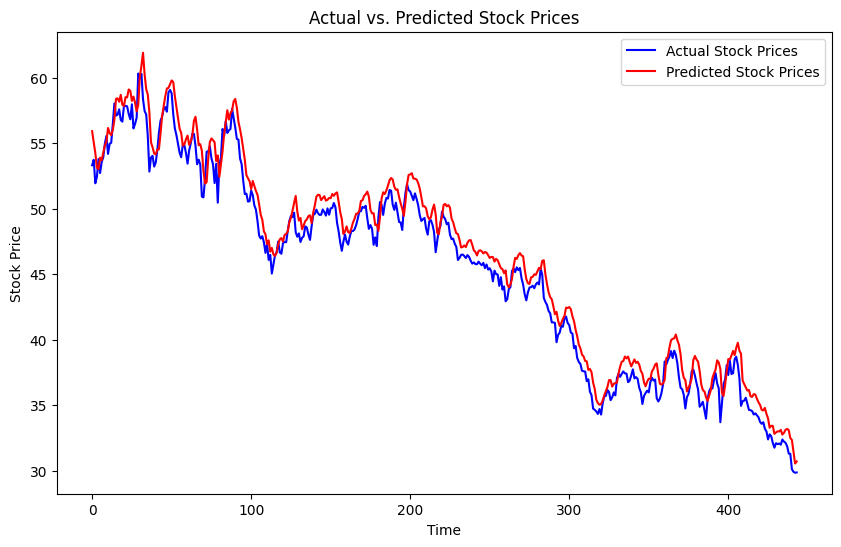

In [ ]:
# Plotting the actual vs. predicted stock prices
plt.figure(figsize=(10,6))

plt.plot(actual_prices, color='blue', label='Actual Stock Prices')
plt.plot(predicted_prices, color='red', label='Predicted Stock Prices')

plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


**6. Evaluation:**

o Calculate the mean absolute error (MAE) and root mean squared error
(RMSE) on the test set.

o Discuss how well the model performed based on these metrics.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculating MAE
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 1.1673685948346113
Root Mean Squared Error (RMSE): 1.3847103783588826


* Data Preprocessing includs loading the dataset, applying Min-Max normalization to the 'Close/Last' prices, and splitting the data into training (80%) and testing (20%) sets.

* Normalization is crucial for efficient model training, enhancing convergence in neural networks.

* RNN architecture with 50 units in the hidden layer, training the model for 50 epochs with a batch size of 32, using Mean Squared Error (MSE) as the loss function and the Adam optimizer. After training, we made predictions on the test set.

* The visual comparison of predicted prices against actual prices revealed a close alignment, particularly during stable periods, illustrating the model's effectiveness.

* The Mean Absolute Error (MAE) of 1.167 indicates that, on average, the predicted stock prices deviate from the actual values by approximately 1.17 units. In the context of stock price prediction, this means that the model’s predicted prices are, on average, about $1.17 off from the actual closing price of Apple Inc. stock.

* The Root Mean Squared Error (RMSE) of 1.38 shows that the standard deviation of the prediction errors is around 1.38 units. RMSE gives more weight to larger errors, meaning it emphasizes predictions that are significantly off. In this case, the model has a reasonable error range of about $1.38.

**Model has limitations**
- Stock prices are affected by unpredictable external factors, including market dynamics and geopolitical events, which historical data alone cannot capture. Additionally, the simplicity of the RNN may overlook complex patterns inherent in financial time series. Exploring more advanced models like Long Short-Term Memory (LSTM) networks could yield better results.